# USING STATISTICS WITH DATASET
FiveThirtyEight posted this dataset regarding movie reviews by different sites. Dataquest also had this as their guided project
but the course is paid.

In [24]:
import pandas as pd
movie_reviews = pd.read_csv("fandango_scores.csv")
print(movie_reviews.columns)
print("------------------------------------------------------------------------------------------------------------")
print(movie_reviews.head())

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')
------------------------------------------------------------------------------------------------------------
                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 

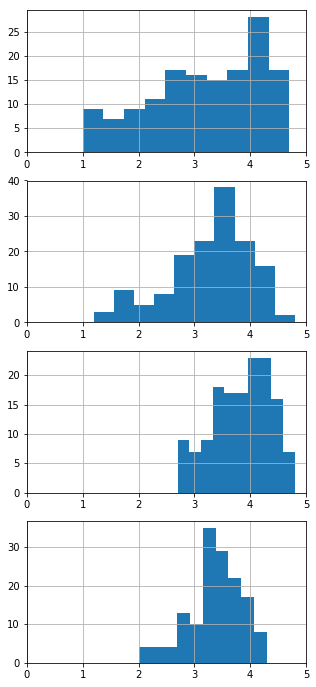

In [14]:

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5)
ax2.set_xlim(0,5)
ax3.set_xlim(0,5)
ax4.set_xlim(0,5)

movie_reviews['RT_user_norm'].hist(ax=ax1)
movie_reviews['Metacritic_user_nom'].hist(ax=ax2)
movie_reviews['Fandango_Ratingvalue'].hist(ax=ax3)
movie_reviews['IMDB_norm'].hist(ax=ax4)

plt.show()


Clearly, the Fandango ratings by the critics are comparitively way more than other movie review sites. <br>
One of the reasons can be that Fandango also sells the movie tickets. While other sites just gives the reviews, so they have more of the Normalized views. Therefore to 
sell more amount of tickets, Fandango gives compartively better reviews.

Let's find the average ratings of the users per site.

In [2]:
import numpy as np
print("Rotten Tomatoes Average Reviews: ",np.mean(movie_reviews["RT_user_norm"]))
print("Metacritic Users Average Reviews: ",np.mean(movie_reviews["Metacritic_user_nom"]))
print("Fandango Users Average Reviews: ",np.mean(movie_reviews["Fandango_Ratingvalue"]))
print("IMBD Users Average Reviews: ",np.mean(movie_reviews['IMDB_norm']))

Rotten Tomatoes Average Reviews:  3.1938356164383572
Metacritic Users Average Reviews:  3.2595890410958885
Fandango Users Average Reviews:  3.8452054794520483
IMBD Users Average Reviews:  3.3684931506849316


Calculating the variance and standard deviation of the user reviews for measuring the spread

In [3]:
def cal_variance(l):
    l_mean = np.mean(l)
    var =0
    for val in l:
        diff = (val-l_mean)
        diff_sq = diff**2
        var += diff_sq
    variance = var/len(l)
    return (variance)
print("Variance Rotten Tomatoes: ",cal_variance(movie_reviews['RT_user_norm']))
print("Standard Deviation: ",np.std(movie_reviews['RT_user_norm']),"\n")
print("Variance Metacritic: ",cal_variance(movie_reviews['Metacritic_user_nom']))
print("Standard Deviation: ",np.std(movie_reviews['Metacritic_user_nom']),"\n")
print("Variance Fandango: ",cal_variance(movie_reviews['Fandango_Ratingvalue']))
print("Standard Deviation: ",np.std(movie_reviews['Fandango_Ratingvalue']),"\n")
print("Variance IMDb: ",cal_variance(movie_reviews['IMDB_norm']))
print("Standard Deviation: ",np.std(movie_reviews['IMDB_norm']))


Variance Rotten Tomatoes:  0.995578438731469
Standard Deviation:  0.9977867701726001 

Variance Metacritic:  0.5666546256333268
Standard Deviation:  0.7527646548778222 

Variance Fandango:  0.25110714955901703
Standard Deviation:  0.5011059264856255 

Variance IMDb:  0.228219647213361
Standard Deviation:  0.4777234003200607


Clearly, Rotten Tomatoes and Metacritic have a higher spread. Though IMDb's spread is not that much, but it's average reviews
came out to be around 3.4 which is fair enough. No doubt why FiveThirtyEight posted this thing. <br>
Now, let's check the relation as to how are high rated movie reviews are related to each site visually.

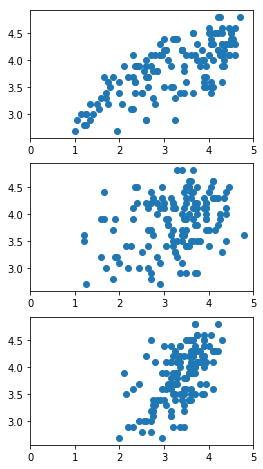

In [13]:
"RT_user_norm"
"Metacritic_user_nom"
"Fandango_Ratingvalue"
'IMDB_norm'


fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0,5)
ax2.set_xlim(0,5)
ax3.set_xlim(0,5)

ax1.scatter(movie_reviews['RT_user_norm'],movie_reviews['Fandango_Ratingvalue'])
ax2.scatter(movie_reviews['Metacritic_user_nom'],movie_reviews['Fandango_Ratingvalue'])
ax3.scatter(movie_reviews['IMDB_norm'],movie_reviews['Fandango_Ratingvalue'])

plt.show()


Let's calculate the covariance of the sites with the Fandango site and check the status

In [5]:
"RT_user_norm"
"Metacritic_user_nom"
"Fandango_Ratingvalue"
'IMDB_norm'

def calc_covariance(l1,l2):
    l1_mean = np.mean(l1)
    l2_mean = np.mean(l2)
    pro=[]
    for i in range(0,len(l1)):
        diff1 = l1[i] - l1_mean
        diff2 = l2[i] - l2_mean
        pro.append(diff1*diff2)
    covar = sum(pro)/len(pro)
    return (covar)

covariance1 = calc_covariance(movie_reviews['RT_user_norm'],movie_reviews['Fandango_Ratingvalue'])
covariance2 = calc_covariance(movie_reviews['Metacritic_user_nom'],movie_reviews['Fandango_Ratingvalue'])
covariance3 = calc_covariance(movie_reviews['IMDB_norm'],movie_reviews['Fandango_Ratingvalue'])

print(covariance1)
print(covariance2)
print(covariance3)


0.3621622255582659
0.1271007693751173
0.1437188027772567


In [12]:
def cal_correlation(l1,l2,cova):
    dv1 = np.std(l1)
    dv2 = np.std(l2)
    pro = dv1*dv2
    correlation = cova/pro
    return (correlation)

correlation1 = cal_correlation(movie_reviews['RT_user_norm'],movie_reviews['Fandango_Ratingvalue'],covariance1)
correlation2 = cal_correlation(movie_reviews['Metacritic_user_nom'],movie_reviews['Fandango_Ratingvalue'],covariance2)
correlation3 = cal_correlation(movie_reviews['IMDB_norm'],movie_reviews['Fandango_Ratingvalue'],covariance3)

print("Correlation between Rotten Tomatoes and Fandango:",correlation1)
print("Correlation between Metacritic and Fandango:",correlation2)
print("Correlation between IMDB and Fandango:",correlation3)
    

Correlation between Rotten Tomatoes and Fandango: 0.7243289942493139
Correlation between Metacritic and Fandango: 0.3369453142649484
Correlation between IMDB and Fandango: 0.6003541772626365


Hence, it's clear that Rotten Tomatoes and Fandango are most closely related. And there is very less correlation between 
Metacritic and Fandango sites.